<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/classification_metrics_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

Name: Rahaf Hosari

### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [38]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Column Trasformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Column Transformer and Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Classification Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### Load Data

1) Check for class balance with value_counts

In [3]:
path = '/content/drive/MyDrive/AXSOSACADEMY/02-IntroML/Week08/Classification Metrics/stroke.csv'
df = pd.read_csv(path)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1137 non-null   int64  
 1   gender             1137 non-null   object 
 2   age                1137 non-null   object 
 3   hypertension       1137 non-null   int64  
 4   heart_disease      1137 non-null   int64  
 5   ever_married       1137 non-null   object 
 6   work_type          1137 non-null   object 
 7   Residence_type     1137 non-null   object 
 8   avg_glucose_level  1137 non-null   float64
 9   bmi                1085 non-null   float64
 10  smoking_status     1137 non-null   object 
 11  stroke             1137 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 106.7+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


#### Duplicates

In [5]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

`There are no duplications in Dataset`

#### Null Values

In [6]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,52


`There are missing Values in BMI (float)`

#### Inconsistencies

In [7]:
df.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1137.000000,1137.000000,1137.000000,1137.000000,1085.000000,1137.000000
mean,36750.933157,0.118734,0.068602,107.664002,29.198065,0.120493
std,21112.281253,0.323617,0.252887,47.618723,7.669615,0.325680
min,77.000000,0.000000,0.000000,55.270000,11.300000,0.000000
25%,17986.000000,0.000000,0.000000,77.600000,24.100000,0.000000
50%,37479.000000,0.000000,0.000000,91.820000,28.500000,0.000000
75%,55410.000000,0.000000,0.000000,113.850000,33.200000,0.000000
max,72918.000000,1.000000,1.000000,266.590000,64.400000,1.000000


##### Object Columns

In [8]:
categorial_cols = df.select_dtypes(include='object').columns
categorial_cols.values

array(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'], dtype=object)

In [9]:
for column in categorial_cols:
  # print the value counts for the column
  count =  df[column].value_counts().sort_values(ascending=False)
  print(f"Value counts for {column} : {count}")
  print()

Value counts for gender : gender
Female    642
Male      494
Other       1
Name: count, dtype: int64

Value counts for age : age
79     26
78     24
57     24
52     23
55     22
       ..
46      7
69      7
12      6
4       6
*82     1
Name: count, Length: 84, dtype: int64

Value counts for ever_married : ever_married
Yes    769
No     368
Name: count, dtype: int64

Value counts for work_type : work_type
Private          672
Self-employed    174
children         147
Govt_job         142
Never_worked       2
Name: count, dtype: int64

Value counts for Residence_type : Residence_type
Urban    587
Rural    550
Name: count, dtype: int64

Value counts for smoking_status : smoking_status
never smoked       416
Unknown            352
formerly smoked    205
smokes             164
Name: count, dtype: int64



Inconsistencies observed in Age column
*82

In [10]:
df['age'] = df['age'].replace(to_replace='*82', value='82')

In [11]:
#To confirm Change
df['age'].value_counts()

,count
age,
79,26
57,24
78,24
52,23
55,22
...,...
46,7
6,7
22,7


#### Gender column to be converted to Object type.

In [12]:
df['gender'] = df['gender'].astype(object)

## 1.Check for class balance with value_counts

In [13]:
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.879507
1,0.120493


The specimen is unbalanced, indicating classes are not equally repesented. People with stroke are less than people without in this dataset.

NOTE Balance the Data


## 2.Prepare a column transformer for preprocessing

### Train Test Split

In [14]:
# Separate X,y and train test split
target = 'stroke'
X = df.drop(columns=target)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# Checking the class balance
y_train.value_counts(normalize=True).sort_index()

,proportion
stroke,
0,0.879108
1,0.120892


### Column Transformer

#### Categorial Columns

In [20]:
categorial_cols = X_train.select_dtypes('object').columns
categorial_cols

Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Since there are no missing values in Categorial Columns no need for Simple Imputer.

##### One Hot Encoder

In [18]:
#OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

##### Pipeline for Categorial Features

In [19]:
#Display Nominal Pipline
nominal_pipeline = make_pipeline(ohe_encoder)
nominal_pipeline

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

#### Numerical Columns

In [21]:
numerical_cols = X_train.select_dtypes('number').columns
numerical_cols

Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [22]:
X_train[numerical_cols].isna().sum()

,0
id,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,40


In [23]:
# Summary stats
X_train[numerical_cols].describe().round(2)

,id,hypertension,heart_disease,avg_glucose_level,bmi
count,852.00,852.00,852.00,852.00,812.00
mean,36116.78,0.12,0.08,108.22,29.20
std,21243.91,0.32,0.26,48.18,7.49
min,77.00,0.00,0.00,55.27,11.30
25%,17100.75,0.00,0.00,77.91,24.20
50%,36887.00,0.00,0.00,92.14,28.60
75%,54575.25,0.00,0.00,114.48,33.10
max,72918.00,1.00,1.00,266.59,64.40


##### Mean Imputer

In [25]:
#Impute by mean
impute_mean = SimpleImputer(strategy='mean')


##### Standard Scaler

In [26]:
scaler = StandardScaler()

##### Pipeline for Numerical Features

In [27]:
numerical_pipeline = make_pipeline(impute_mean,scaler)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

#### Column Transformer

##### Categorial Tuple (Nominal)

In [31]:
categorial_tuple = ('categorial', nominal_pipeline, categorial_cols)
categorial_tuple

('categorial',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

##### Numerical Tuple

In [30]:
numerical_tuple = ('numerical', numerical_pipeline, numerical_cols)
numerical_tuple

('numerical',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))

## 3.Build and fit a model pipeline with the preprocessor and a default decision tree classifer (use a random_state of 42)

### Column Transformer (Processor)

In [32]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([categorial_tuple,numerical_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('categorial',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                ('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                  verbose_feature_names_out=False)

### Decision Tree Classifier

In [33]:
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)

### Pipeline ( Column Transformer + Decision Tree)

In [65]:
dec_tree_pipeline = make_pipeline(preprocessor,dec_tree)
dec_tree_pipeline
## This is classification Pipeline we can also call it clf_pipeline,
## which combines the column transformer and the classification decision tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Fit Data

In [35]:
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorial',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'age', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## 4.Evaluate the classification model using the custom function to produce the confusion matrix and classification report.

### Make predictions for training and testing data


In [44]:
# train_preds = dec_tree_pipeline.predict(X_train)
# test_preds = dec_tree_pipeline.predict(X_test)
# test_preds

The values represent 0 and 1, since 0 No stroke and 1 troke

In [42]:
# Calculate classification accuracy
# train_score = accuracy_score(y_train, train_preds)
# test_score = accuracy_score(y_test, test_preds)
# print (f'The training accuracy is {train_score}.')
# print (f'The testing accuracy is {test_score}.')

The training accuracy is 1.0.
The testing accuracy is 0.8175438596491228.


In [45]:
# Define the predicted values
y_pred_train = dec_tree_pipeline.predict(X_train)
y_pred_test = dec_tree_pipeline.predict(X_test)

In [50]:
# Obtain the accuracy score
train_acc = accuracy_score(y_pred_train, y_train)
test_acc = accuracy_score(y_pred_test, y_test)

# Print the results
print(f'Training accuracy : {round(train_acc,2)}.')
print(f'Testing accuracy  : {round(test_acc,2)}.')

Training accuracy : 1.0.
Testing accuracy  : 0.82.


Explanation on Accuracy
- The model has perfectly learned the training data.
- While the model fits the training data perfectly, it struggles to generalize to new data as the accuracy for test is 82%.
- These results suggest in Overfitting, since the data initially is unbalanced for Stroke.

### Confusion Matrix

In [51]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[222,  29],
       [ 23,  11]])

In [54]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,222,29
1,23,11


#### Plot Confusion Matrix

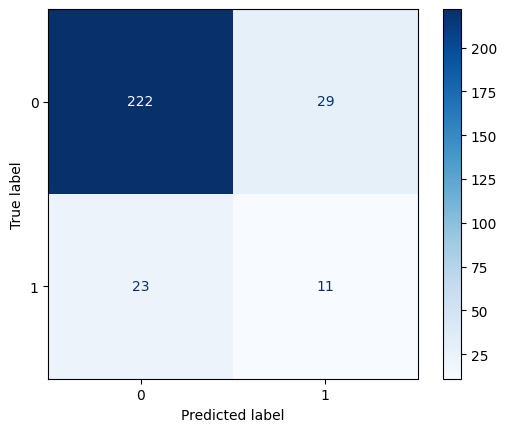

In [56]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Blues');

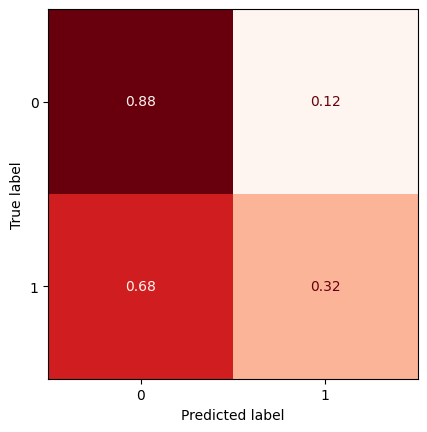

In [61]:
# Plot the confusion matrix from the predictions
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,normalize='true',
                                        #xticks_rotation=45,
                                        colorbar=False,
                                        cmap='Reds')

### Classification Report

#### Classification Helper Function

##### Classification Metrics

In [63]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

##### Calssification Evaluation

In [62]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

#### Classification Report

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



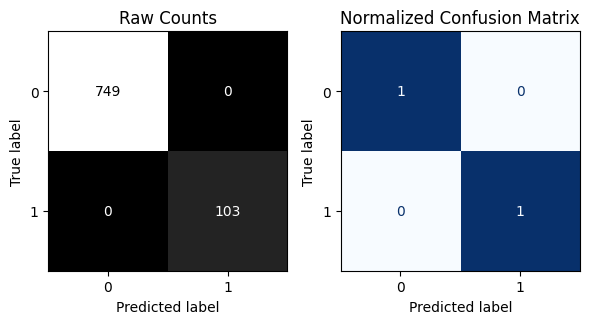


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       251
           1       0.28      0.32      0.30        34

    accuracy                           0.82       285
   macro avg       0.59      0.60      0.60       285
weighted avg       0.83      0.82      0.82       285



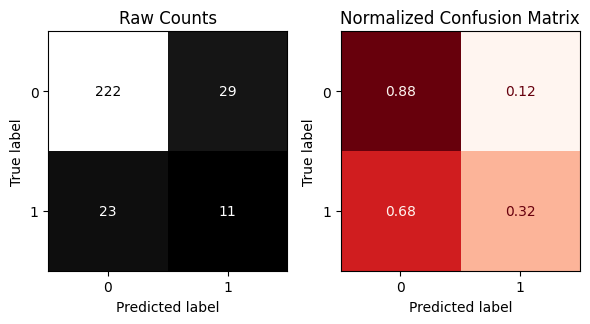

In [66]:
results = evaluate_classification(dec_tree_pipeline,X_train, y_train, X_test, y_test,output_dict=True)